In [1]:
import numpy as np
import pandas as pd 
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
import datetime

In [2]:
import os
os.chdir(r'D:/data')

In [3]:
df = pd.read_csv('tesla_stock.csv', index_col='Date',parse_dates=True)
df = df.sort_index(ascending=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Stock Price Visualization

In [4]:
import matplotlib
from mpl_finance import candlestick2_ohlc

D:\anaconda\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


## Candlestick Plot

(24.079495124999994, 814.89701575)

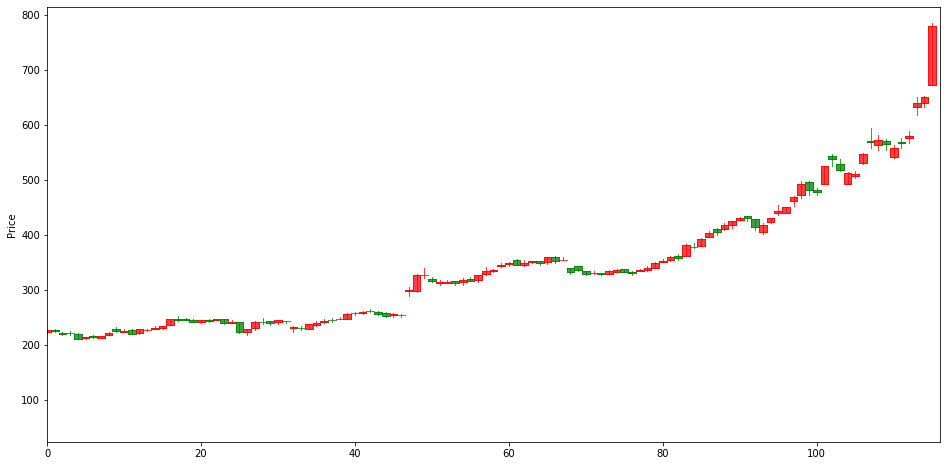

In [5]:
df2 = df[['Open','High','Low','Close','Volume']]
df3 = df2[2300:]
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 1, 1)
candlestick2_ohlc(ax, df3["Open"], df3["High"], df3["Low"], df3["Close"],width=1.0, colorup="r", colordown="g")
ax.set_xlim([0, df3.shape[0]]) 
ax.set_ylabel("Price")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom - (top - bottom) / 4, top)

## Time Series Plot

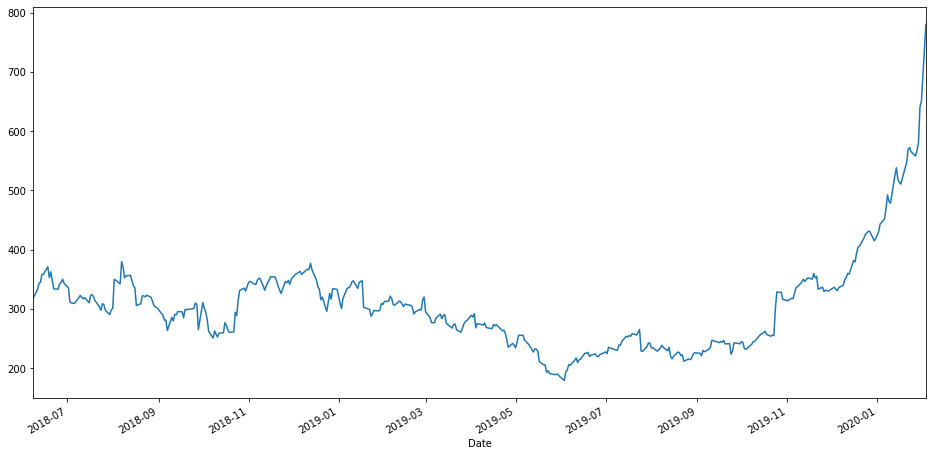

In [6]:

df1 =df[['Close','Volume']]
df1['Close'][2000:].plot(subplots=False,figsize=(16,8)) 

## Moving Average Plot

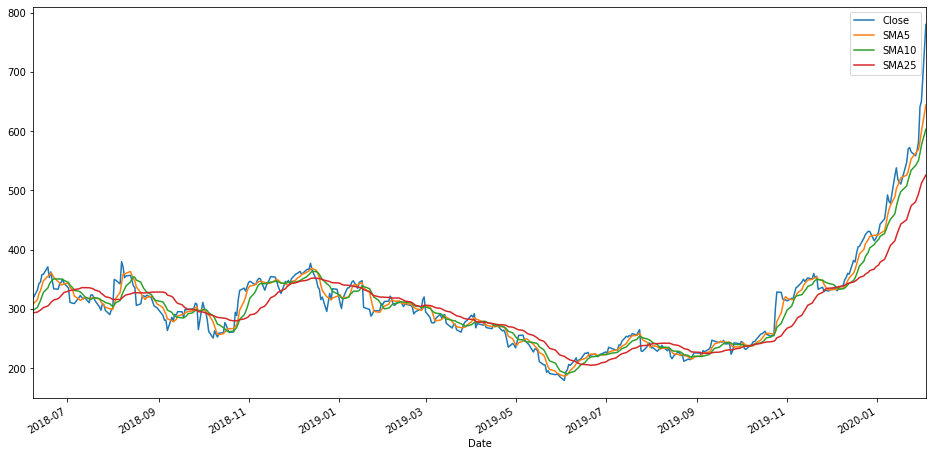

In [7]:
ma_day = [5,10,15,20,25]

for ma in ma_day:
    column_name = "SMA{}".format(str(ma))
    df1[column_name]=pd.DataFrame.rolling(df1['Close'],ma).mean()

df1[['Close','SMA5','SMA10','SMA25']][2000:].plot(subplots=False,figsize=(16,8))

## Pct_Change Plot

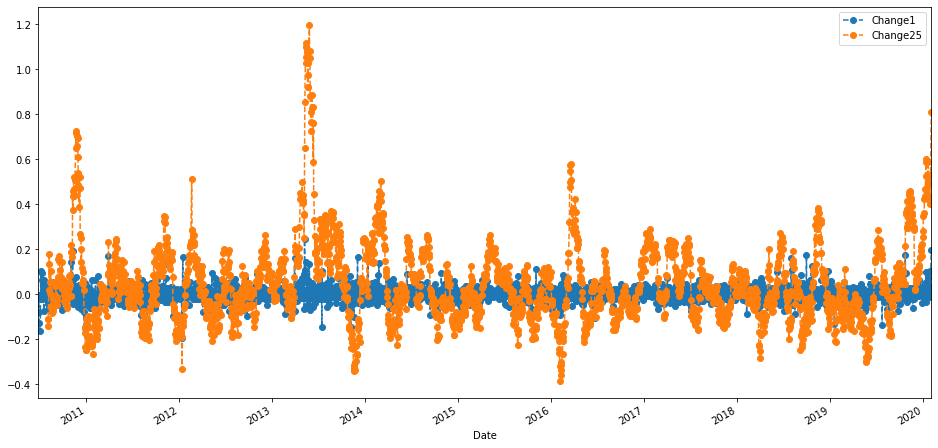

In [8]:
ma_day = [1,5,10,15,20,25]
for ma in ma_day:
    column_name = "Change{}".format(str(ma))
    df1[column_name] = df1['Close'].pct_change(ma)

# % rate of change
df1[['Change1','Change25']].plot(figsize=(16,8),legend=True,linestyle='--',marker='o')

## Diff Plot

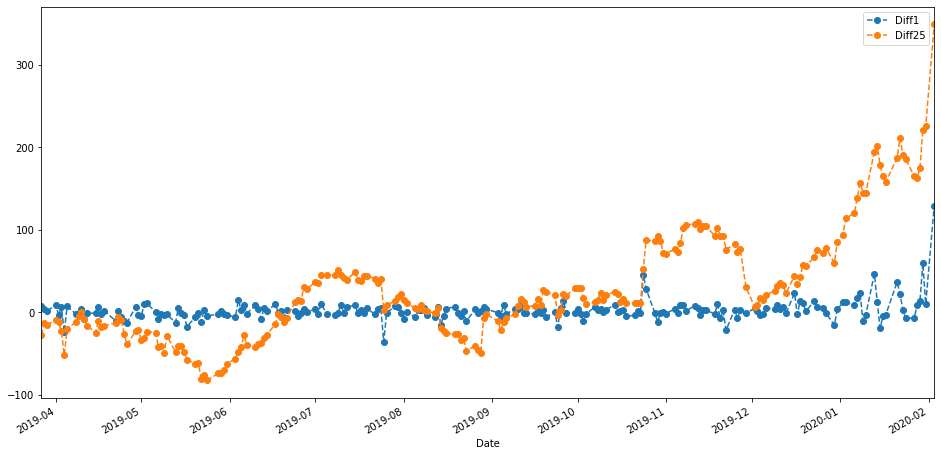

In [9]:
ma_day = [1,5,10,15,20,25]
for ma in ma_day:
    column_name = "Diff{}".format(str(ma))
    df1[column_name] = df1['Close'].diff(ma)

# amount of change
df1[['Diff1','Diff25']][2200:].plot(figsize=(16,8),legend=True,linestyle='--',marker='o')

## Exponential Weighted Moving Average Plot

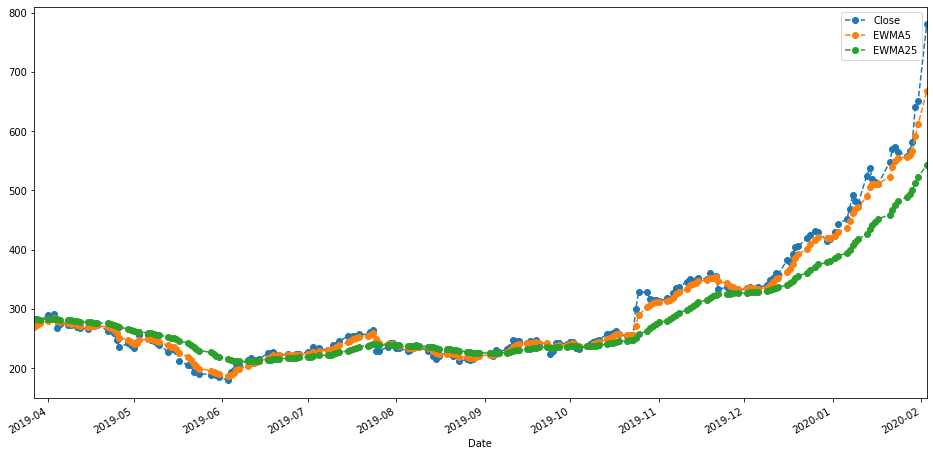

In [10]:
ma_day = [5,10,15,20,25]
for ma in ma_day:
    column_name = "EWMA{}".format(str(ma))
    df1[column_name] = pd.DataFrame.ewm(df1['Close'],span=ma).mean()

df1[['Close','EWMA5','EWMA25']][2200:].plot(figsize=(16,8),legend=True,linestyle='--',marker='o')

## Bolling Band Plot

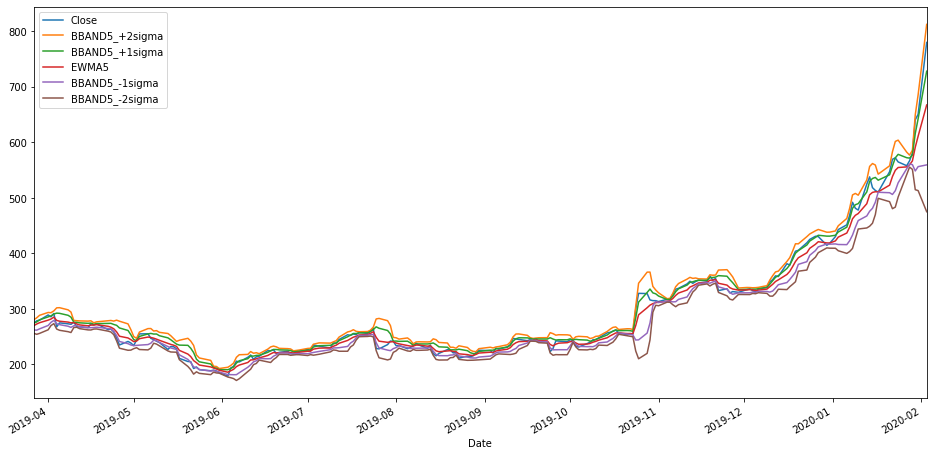

In [11]:
ma_day = [5,10,15,20,25]
for ma in ma_day:
    column_name = "BBAND{}".format(str(ma))
    df1[column_name+'_+1sigma'] = (pd.DataFrame.rolling(df1['Close'], ma).mean() + pd.DataFrame.rolling(df1['Close'], ma).std())
    df1[column_name+'_-1sigma'] = (pd.DataFrame.rolling(df1['Close'], ma).mean() - pd.DataFrame.rolling(df1['Close'], ma).std())
    df1[column_name+'_+2sigma'] = (pd.DataFrame.rolling(df1['Close'], ma).mean() + 2 * pd.DataFrame.rolling(df1['Close'], ma).std())
    df1[column_name+'_-2sigma'] = (pd.DataFrame.rolling(df1['Close'], ma).mean() - 2 * pd.DataFrame.rolling(df1['Close'], ma).std())


df1[['Close','BBAND5_+2sigma','BBAND5_+1sigma','EWMA5','BBAND5_-1sigma','BBAND5_-2sigma']][2200:].plot(figsize=(16,8),legend=True)